<a href="https://colab.research.google.com/github/rodrigo8502/projeto5/blob/main/games_description2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## games description



In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack  # Para combinar as matrizes esparsas
from sklearn.metrics import make_scorer


## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/games_description.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [ ]:
dataset.tail()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
285,MXGP PRO,Adjust your bike's configuration like a mechan...,About This Game\n\t\t\t\t\t\t\tThe official vi...,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(777),433,https://store.steampowered.com/app/798290/MXGP...
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,About This Game\n\t\t\t\t\t\t\tThe official Mo...,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(90% of 858) All Time,446,https://store.steampowered.com/app/1018160/MXG...
287,Ride 2,The fastest and most iconic bikes in the world...,About This Game\n\t\t\t\t\t\t\tWelcome to the ...,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,"7 Oct, 2016",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,"(86% of 2,335) All Time","1,045",https://store.steampowered.com/app/477770/Ride...
288,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","4 Dec, 2020",['Rewind Games'],['Rewind Games'],Very Positive,(93% of 420) All Time,451,https://store.steampowered.com/app/1251460/Tan...
289,Grand Mountain Adventure: Wonderlands,Grand Mountain Adventure: Wonderlands lets you...,About This Game\n\t\t\t\t\t\t\tGrand Mountain ...,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Mar, 2022",['Toppluva AB'],['Microids'],Very Positive,(94% of 196) All Time,246,https://store.steampowered.com/app/1247360/Gra...


In [ ]:
dataset.shape

(290, 13)

In [ ]:
# Verificar os valores únicos na coluna 'App'
valores_unicos = dataset['overall_player_rating'].value_counts()
print(valores_unicos)


overall_player_rating
Very Positive              146
Overwhelmingly Positive     82
Mixed                       26
Mostly Positive             25
Mostly Negative              4
Very Negative                2
7 user reviews               1
Positive                     1
1 user reviews               1
6 user reviews               1
4 user reviews               1
Name: count, dtype: int64


In [ ]:
print(y_train_encoded.isnull().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [ ]:
dataset['short_description'] = dataset['short_description'].fillna(dataset['short_description'].mode()[0])

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

# Vetorização de cada coluna de texto
X_short_desc = vectorizer.fit_transform(dataset['short_description'])
X_long_desc = vectorizer.fit_transform(dataset['long_description'])
X_genres = vectorizer.fit_transform(dataset['genres'])
X_minimum_system_requirement = vectorizer.fit_transform(dataset['minimum_system_requirement'])
X_recommend_system_requirement = vectorizer.fit_transform(dataset['recommend_system_requirement'])
X_developer = vectorizer.fit_transform(dataset['developer'])
X_publisher = vectorizer.fit_transform(dataset['publisher'])
# Concatenando as matrizes vetorizadas (horizontalmente)
X_combined = hstack([X_short_desc, X_long_desc, X_genres, X_minimum_system_requirement, X_recommend_system_requirement, X_developer, X_publisher])

# Verificando o tipo e as dimensões do resultado combinado
print(f"\nDimensões da matriz combinada: {X_combined.shape}")
print(f"Tipo da matriz combinada: {X_combined.dtype}")


Dimensões da matriz combinada: (290, 16656)
Tipo da matriz combinada: float64


In [ ]:
X_dense = X_combined.toarray()

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:, 1:9]
y = array[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X_dense, y_train_encoded,
    test_size=test_size, shuffle=True, random_state=seed) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [ ]:
dataset['short_description'] = dataset['short_description'].astype(str)
dataset['long_description'] = dataset['long_description'].astype(str)
dataset['genres'] = dataset['genres'].astype(str)
dataset['minimum_system_requirement'] = dataset['minimum_system_requirement'].astype(str)
dataset['recommend_system_requirement'] = dataset['recommend_system_requirement'].astype(str)
dataset['developer'] = dataset['developer'].astype(str)
dataset['publisher'] = dataset['publisher'].astype(str)


In [ ]:
# Convertendo toda a coluna para string antes de aplicar .lower()
dataset['short_description'] = dataset['short_description'].astype(str).apply(lambda x: x.lower())

print(dataset)


In [ ]:
print(y_train.dtype)

int64


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
print(np.any(pd.isna(y_train)))  # Verifique se há NaNs





False


In [ ]:
# Contando o número de NaNs em y_train
num_nans = np.sum(np.isnan(y_train))

# Exibindo o número de NaNs
print(f"Número de NaNs em y_train: {num_nans}")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Converter as classes de 'object' para números com LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y)

In [ ]:
print(X_train.shape)  # Verifique a forma de X
print(y_train.shape)  # Verifique a forma de y


(232, 16656)
(232,)


In [ ]:
import pandas as pd

# Convertendo y para uma Series do pandas
y = pd.Series(y_train)

# Preenchendo os NaN com a média
y = y.fillna(y.mode())

# Verificando o tipo e os primeiros valores de y após o tratamento
print(y.dtype)
print(y.head())


object
0    Overwhelmingly Positive
1              Very Positive
2             6 user reviews
3                      Mixed
4    Overwhelmingly Positive
dtype: object


In [ ]:
y_train = y_train.astype(float)

ValueError: could not convert string to float: 'Overwhelmingly Positive'

In [ ]:
dataset['overall_player_rating'] = dataset['overall_player_rating'].fillna(dataset['overall_player_rating'].mode()[0])

## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
dataset.dtypes

,0
name,object
short_description,object
long_description,object
genres,object
minimum_system_requirement,object
recommend_system_requirement,object
release_date,object
developer,object
publisher,object
overall_player_rating,object


In [ ]:
# Verificar os tipos de dados de X e y
print("Tipos de dados de X:", X.dtype)
print("Tipos de dados de y:", y.dtype)

Tipos de dados de X: object
Tipos de dados de y: object


In [ ]:
# Converter X e y para float
X = X.astype(float)
y = y.astype(float)

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=8)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
features = fit.transform(X_train)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[1:9])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", vectorizer.get_feature_names_out(input_features=dataset.columns[1:9]))


Número original de atributos: 8

Número reduzido de atributos: 8

Atributos Originais: Index(['short_description', 'long_description', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher'],
      dtype='object')

Scores dos Atributos Originais: [0.317 0.123 0.366 ... 0.289   nan 0.328]

Atributos Selecionados: ['11' '2k' '3909' '505' 'ab' 'abyss' 'activision' 'afterburn' 'amistech'
 'anegar' 'appnori' 'arts' 'asia' 'aspyr' 'axe' 'bandai' 'beamng'
 'behaviour' 'berserk' 'bethesda' 'bit' 'blizzard' 'bohemia' 'bonus'
 'bros' 'bungie' 'burst2flame' 'capcom' 'carx' 'cat' 'cd' 'cherry' 'coast'
 'coconut' 'codemasters' 'coffee' 'collective' 'com' 'com2us'
 'concernedape' 'creations' 'creative' 'crit' 'crystal' 'curve'
 'dandylion' 'day' 'deep' 'developments' 'devolver' 'digital' 'dire'
 'disney' 'district' 'division' 'dovetail' 'dressed' 'duoyi' 'dynamics'
 'eagle' 'easy' 'electronic' 'endnight' 'engine' 'enix' 'entert

In [ ]:
# Exibindo as palavras selecionadas com base em seus índices
selected_indices = best_var.get_support(indices=True)
selected_features = vectorizer.get_feature_names_out()

print("\nAtributos Selecionados (palavras):")
for i in selected_indices:
    print(selected_features[i])



Atributos Selecionados (palavras):


IndexError: index 16168 is out of bounds for axis 0 with size 252

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.551630 (0.093417)
KNN: 0.469022 (0.112699)
CART: 0.449275 (0.083773)
NB: 0.496196 (0.121575)
SVM: 0.504529 (0.114051)
Bagging: 0.581884 (0.114394)
RF: 0.534601 (0.110494)
ET: 0.543297 (0.112542)
Ada: 0.483152 (0.124587)
GB: 0.482790 (0.101989)
Voting: 0.530254 (0.108042)


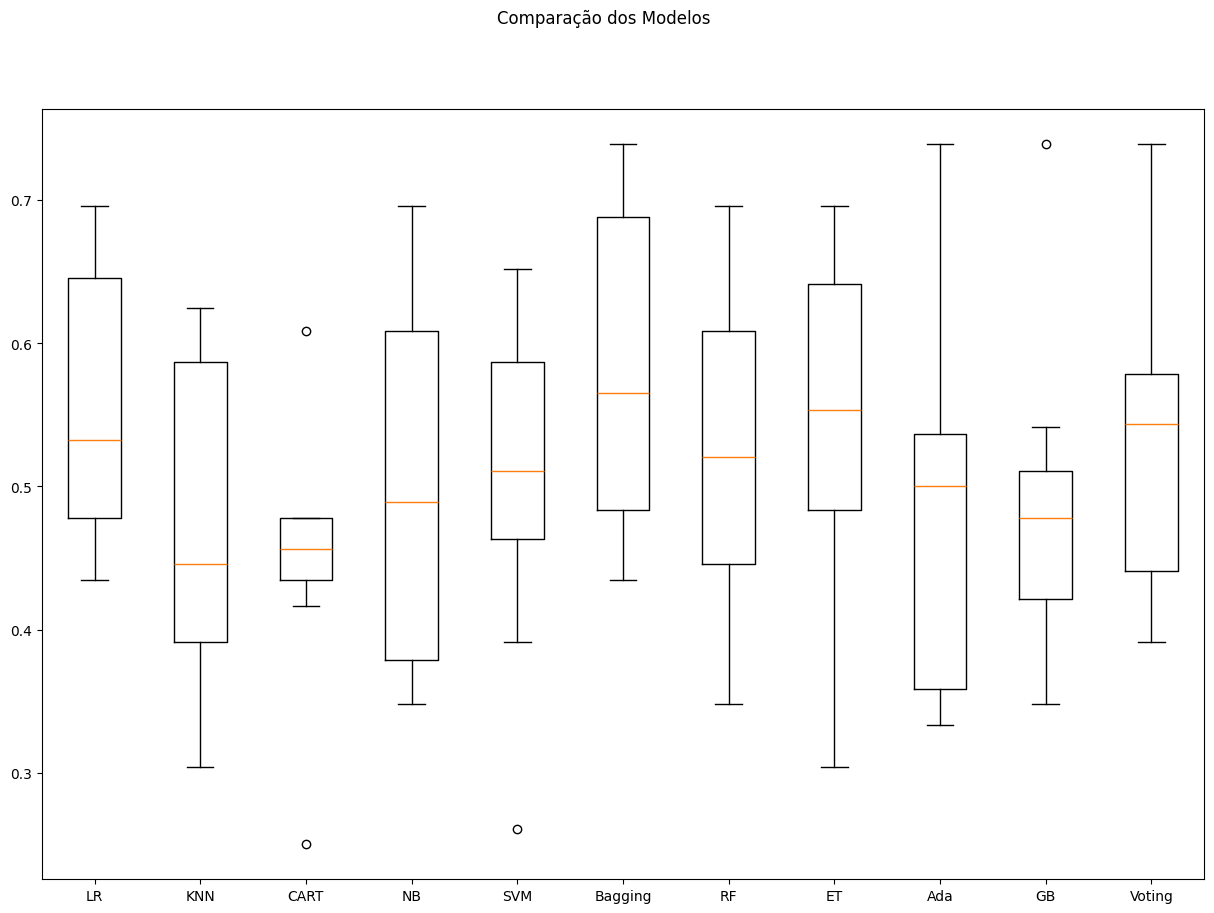

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

scoring = 'accuracy'

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.552 (0.093)
KNN-orig: 0.469 (0.113)
CART-orig: 0.449 (0.084)
NB-orig: 0.496 (0.122)
SVM-orig: 0.505 (0.114)
Bag-orig: 0.582 (0.114)
RF-orig: 0.535 (0.110)
ET-orig: 0.543 (0.113)
Ada-orig: 0.483 (0.125)
GB-orig: 0.483 (0.102)
Vot-orig: 0.530 (0.108)
LR-padr: 0.556 (0.085)
KNN-padr: 0.116 (0.070)
CART-padr: 0.428 (0.114)
NB-padr: 0.483 (0.088)
SVM-padr: 0.496 (0.111)
Bag-padr: 0.564 (0.113)
RF-padr: 0.538 (0.110)
ET-padr: 0.530 (0.113)
Ada-padr: 0.483 (0.120)
GB-padr: 0.509 (0.101)
Vot-padr: 0.530 (0.098)
LR-norm: 0.560 (0.086)
KNN-norm: 0.345 (0.063)
CART-norm: 0.427 (0.090)
NB-norm: 0.478 (0.093)
SVM-norm: 0.496 (0.111)
Bag-norm: 0.569 (0.133)
RF-norm: 0.543 (0.117)
ET-norm: 0.543 (0.113)
Ada-norm: 0.496 (0.115)
GB-norm: 0.513 (0.108)
Vot-norm: 0.552 (0.094)


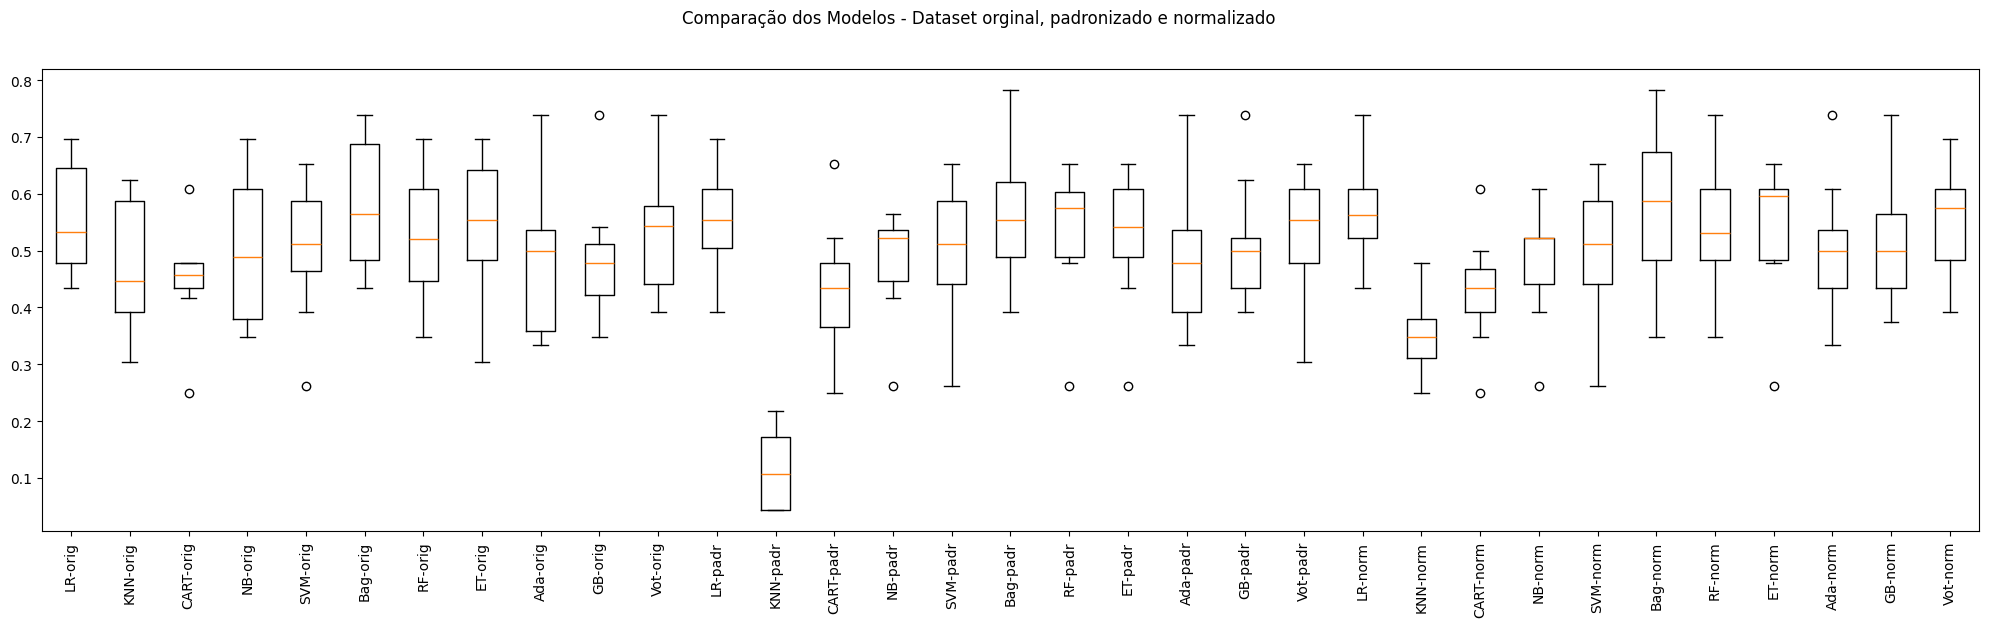

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do AdaBoostRegressor

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
bagging = ('Bagging', BaggingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('bag-orig', Pipeline(steps=[bagging])))
pipelines.append(('bag-padr', Pipeline(steps=[standard_scaler, bagging])))
pipelines.append(('bag-norm', Pipeline(steps=[min_max_scaler, bagging])))

param_grid = {
    'Bagging__n_estimators': [50, 100, 200],  # Número de estimadores (árvores)
    'Bagging__max_samples': [0.01, 1, 1],  # Taxa de aprendizado
    'Bagging__max_features': [0.5, 0.8, 1]  # Taxa de aprendizado
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: bag-orig - Melhor: 0.500000 usando {'Bagging__max_features': 0.8, 'Bagging__max_samples': 0.01, 'Bagging__n_estimators': 100}
Sem tratamento de missings: bag-padr - Melhor: 0.495833 usando {'Bagging__max_features': 0.5, 'Bagging__max_samples': 0.01, 'Bagging__n_estimators': 50}
Sem tratamento de missings: bag-norm - Melhor: 0.500000 usando {'Bagging__max_features': 0.8, 'Bagging__max_samples': 0.01, 'Bagging__n_estimators': 100}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = BaggingClassifier(n_estimators=200, random_state=42)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.6206896551724138


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X_train) # ajuste do scaler com TODO o dataset
rescaledX_train = scaler.transform(X_train) # aplicação da padronização com TODO o dataset


model.fit(rescaledX_train, y_train)

BaggingClassifier(n_estimators=200, random_state=42)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'short_description':  ['action rpg', 'open world', 'rpg'],
        'long_description': ['rpg', 'rpg', 'rpg'],
        'genres': ['rpg', 'sports', 'open world' ],
        'minimum_system_requirement': ['windows7', 'windows7', 'windows10'],
        'recommend_system_requirement': ['windows10', 'windows7', 'windows10'],
        'developer': ['ubisoft', 'valve', 'nintendo' ],
        'publisher': ['ubisoft', 'valve', 'nintendo' ]

        }

atributos = ['short_description', 'long_description', 'genres', 'minimum_system_requirement', 'recommend_system_requirement', 'developer', 'publisher', ]
entrada = pd.DataFrame(data, columns=atributos)



# Agora os dados estão numéricos e podem ser padronizados
scaler = StandardScaler()

# Ajuste do scaler nos dados codificados
scaler.fit(X_dense)

# Aplicação da padronização nos dados de entrada
rescaledEntradaX = scaler.transform(X_dense)

# Exibe os dados padronizados
print(rescaledEntradaX)

[[-0.081 -0.059 -0.083 ... -0.179 -0.059 -0.059]
 [-0.081 -0.059 -0.083 ... -0.179 -0.059 -0.059]
 [-0.081 -0.059 -0.083 ... -0.179 -0.059 -0.059]
 ...
 [-0.081 -0.059 -0.083 ... -0.179 -0.059 -0.059]
 [-0.081 -0.059 -0.083 ... -0.179 -0.059 -0.059]
 [-0.081 -0.059 -0.083 ... -0.179 -0.059 -0.059]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[ 7 10  4 10 10  4  4 10  6  4 10  6  6 10 10 10 10 10 10 10  4 10  4  4
 10  6 10 10  5  7 10  5 10  7 10  6  6 10  7 10 10 10 10  6 10 10  7  7
  7 10  7  7 10  7  7  7 10 10 10  7 10 10  7  7 10 10 10  7  7 10  6 10
  6  4 10 10 10 10 10  4 10 10 10 10 10  4  7 10  7  7 10 10 10  4 10  7
  7  7 10 10 10 10  7 10  6 10  6 10  7  7  7  7  7 10 10  7  7  7  7 10
 10  7 10  7  7 10  7  4 10  4  7 10 10  7 10  7  6  7 10 10 10  4  7 10
 10 10  6 10 10  7 10 10 10  6  6  4  7 10  4 10  7 10 10  7  7 10  7  7
 10 10  7 10  7  7 10  7  7 10  7 10 10 10 10 10  4 10  6  5 10  4  7 10
  4 10  7 10 10  6 10 10  6 10 10 10  7 10 10  7  7  7  7  7 10  7  7 10
  7  7 10  7 10 10 10 10  4 10  4 10  6  4 10 10  4 10  9  4 10  9  4  7
 10  4  6 10  6 10 10 10  5 10 10  9 10  8 10 10  2  1  7  6 10 10  7  7
 10 10 10 10 10 10 10 10 10  7 10  7 10  7 10 10 10 10 10  7 10 10 10 10
 10 10]
